In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [60]:
data = pd.read_csv('50_Startups1.csv')
data.head(10)

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [62]:
data.isnull().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [63]:
data.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [64]:
data.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [65]:
sn.pairplot(data)

In [66]:
x = data.iloc[:,0:3]
y = data.iloc[:,4:]

In [67]:
model = smf.ols("y~x",data=data).fit()

In [68]:
model.params

Intercept    50122.192990
x[0]             0.805715
x[1]            -0.026816
x[2]             0.027228
dtype: float64

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           4.53e-30
Time:                        18:29:30   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x[0]           0.8057      0.045     17.846      0.000       0.715       0.897
x[1]          -0.0268      0.051     -0.526      0.602      -0.130       0.076
x[2]           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Simple linear Regression

In [70]:
m = smf.ols("Profit~Administration",data=data).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sat, 30 Dec 2023   Prob (F-statistic):              0.162
Time:                        18:29:30   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
m1 = smf.ols("Profit ~ Marketing_Spend",data=data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           4.38e-10
Time:                        18:29:30   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
m2 = smf.ols("Profit~RD_Spend",data=data).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           3.50e-32
Time:                        18:29:30   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
m3 = smf.ols("Profit~RD_Spend+Marketing_Spend",data=data).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           2.16e-31
Time:                        18:29:31   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculating VIF

In [74]:
rsq_adm = smf.ols('Administration~RD_Spend+Marketing_Spend',data=data).fit().rsquared  
vif_adm = 1/(1-rsq_adm) 

rsq_RD = smf.ols('RD_Spend~Administration+Marketing_Spend',data=data).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 

rsq_mark = smf.ols('Marketing_Spend~Administration+RD_Spend',data=data).fit().rsquared  
vif_mark = 1/(1-rsq_mark) 




d1 = {'Variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_RD,vif_adm,vif_mark]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


# Residual Analysis

# Test for Normality of Residuals (Q-Q Plot)

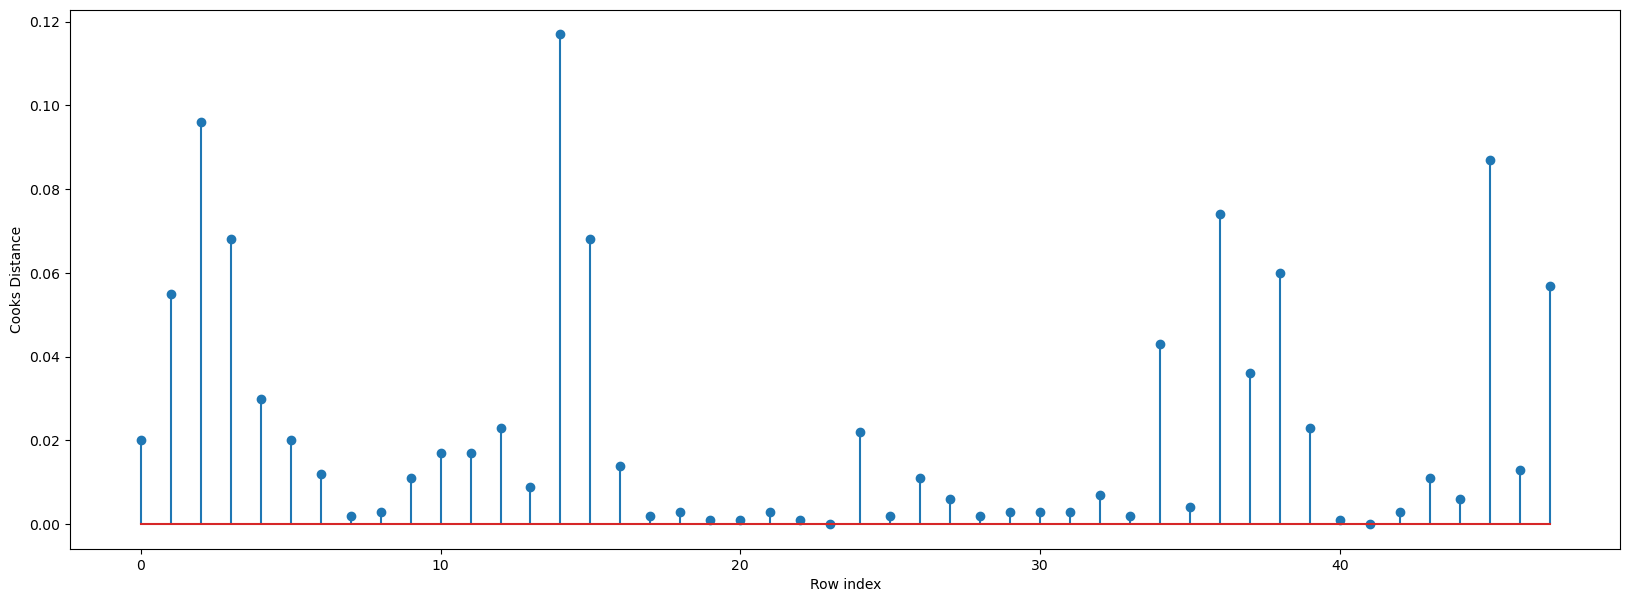

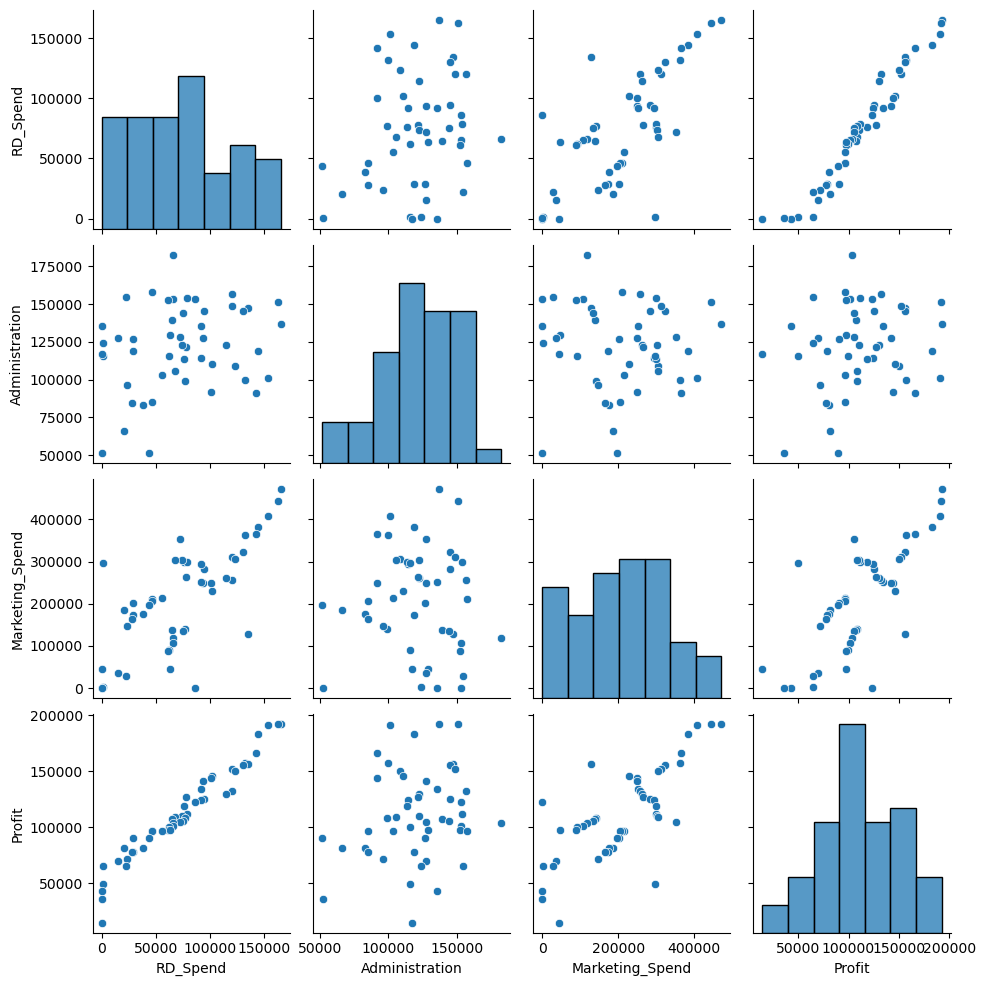

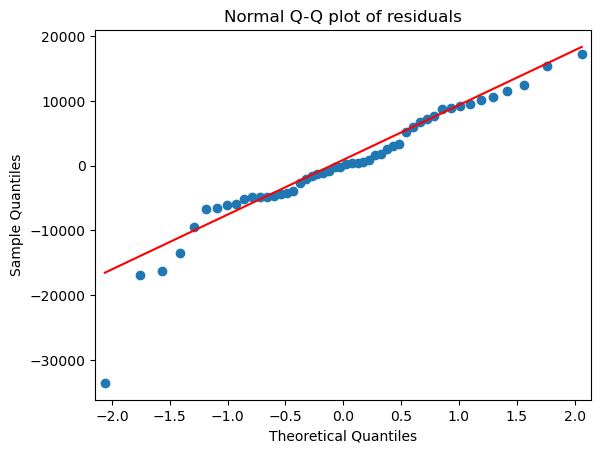

In [75]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity

In [76]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

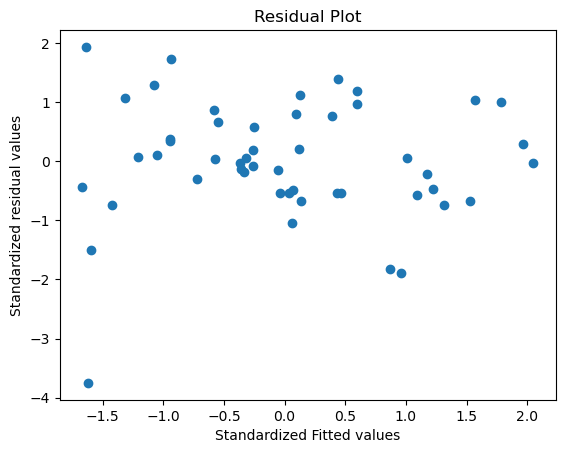

In [77]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


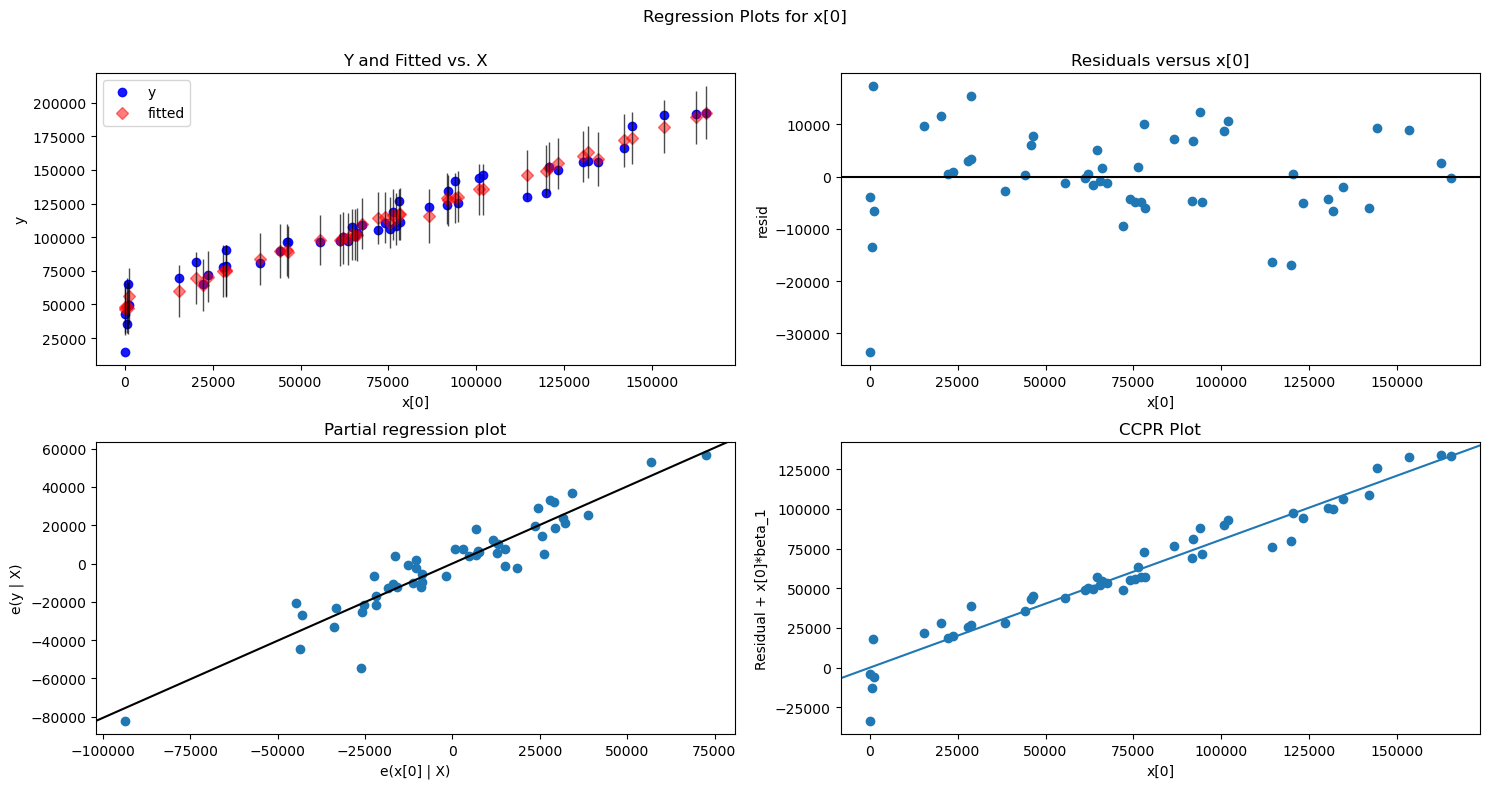

In [78]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "x[0]", fig=fig)
plt.show()

In [79]:
model.model.exog_names

['Intercept', 'x[0]', 'x[1]', 'x[2]']

eval_env: 1


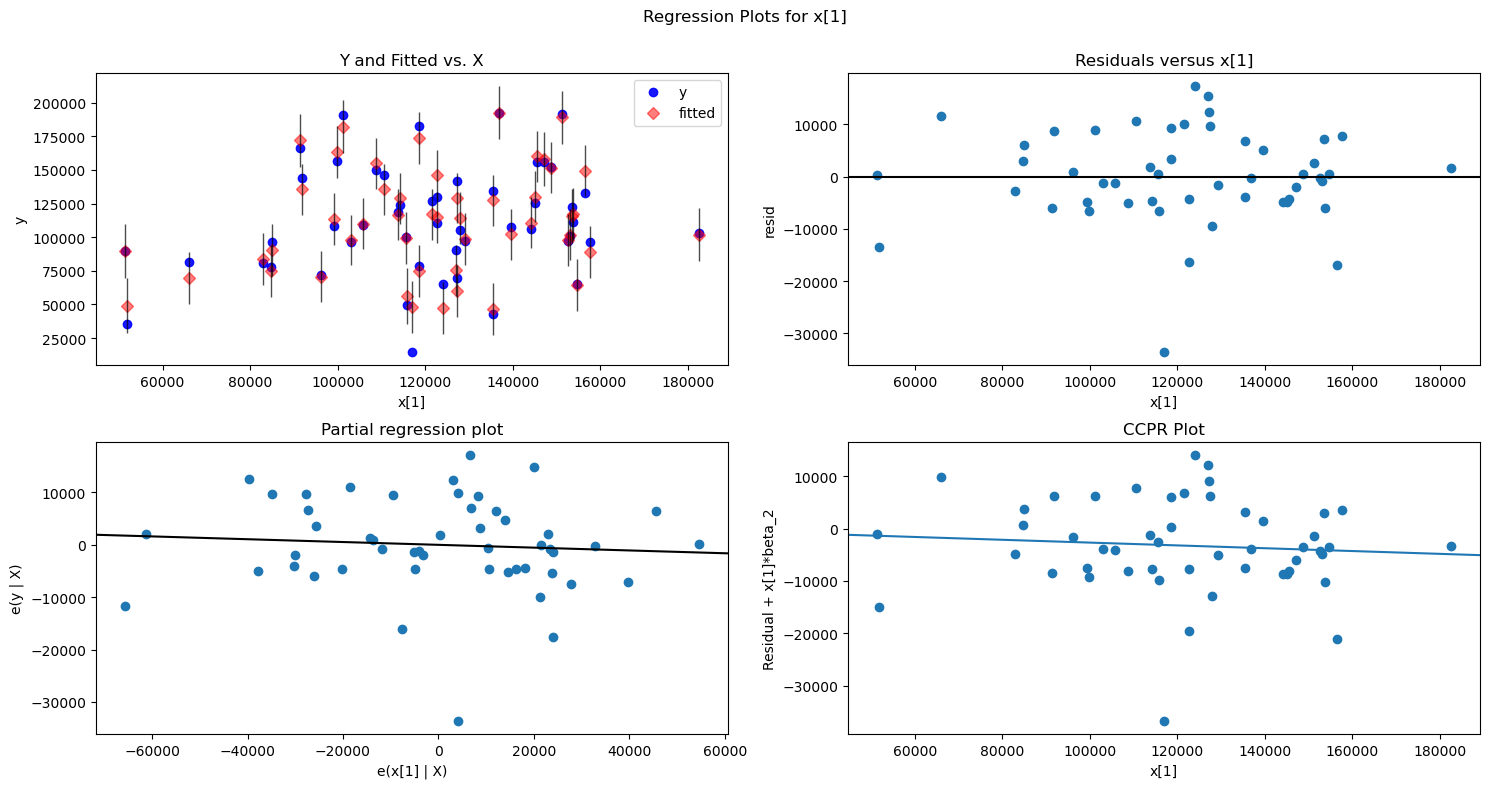

In [80]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "x[1]", fig=fig)
plt.show()

eval_env: 1


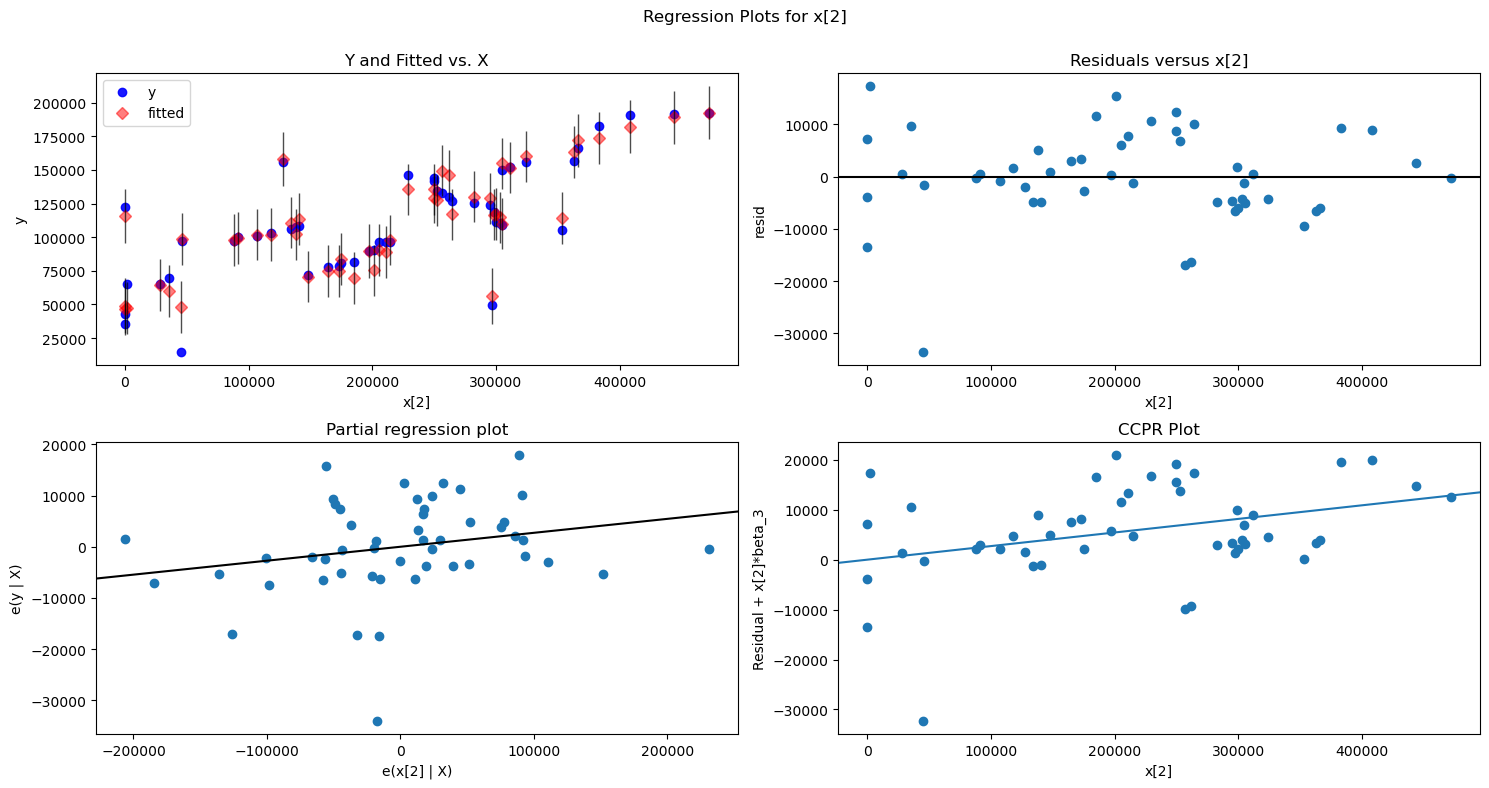

In [81]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "x[2]", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Influencers/Outliers

# Cook’s Distance

In [82]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

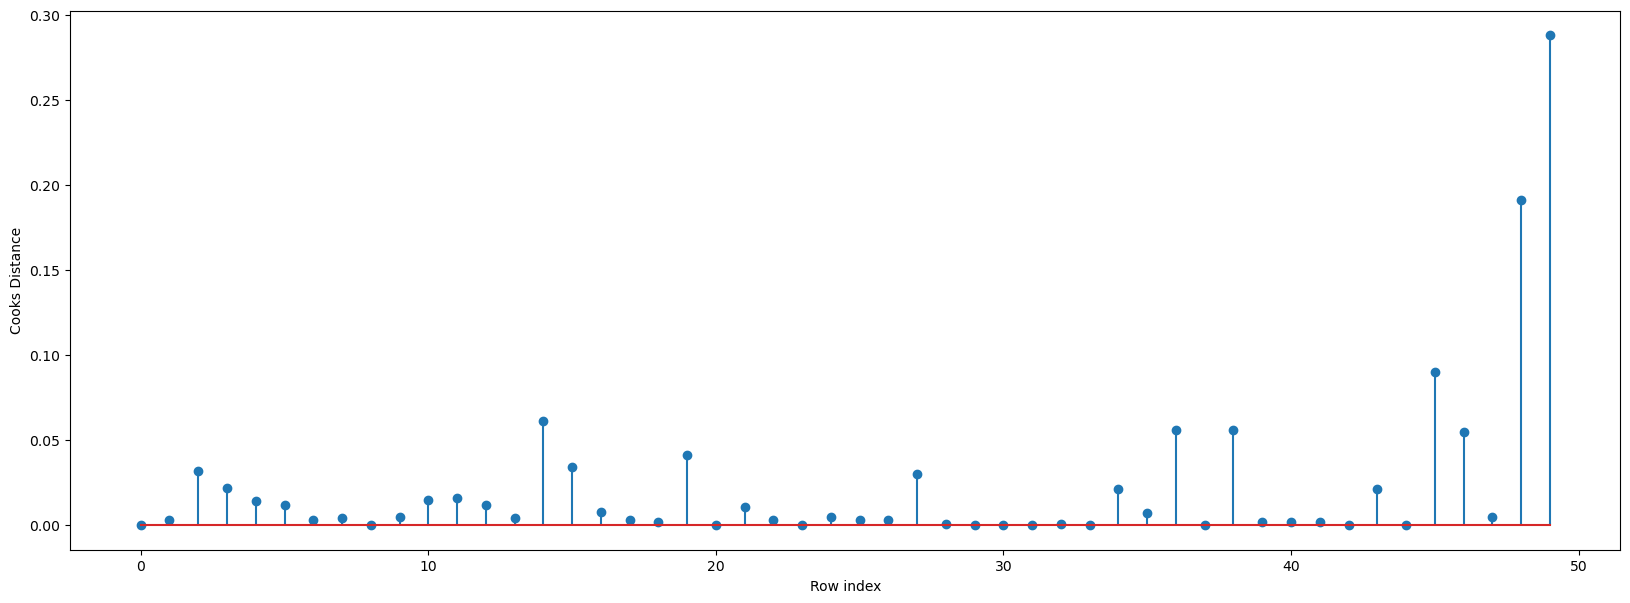

In [83]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [84]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

# High Influence points

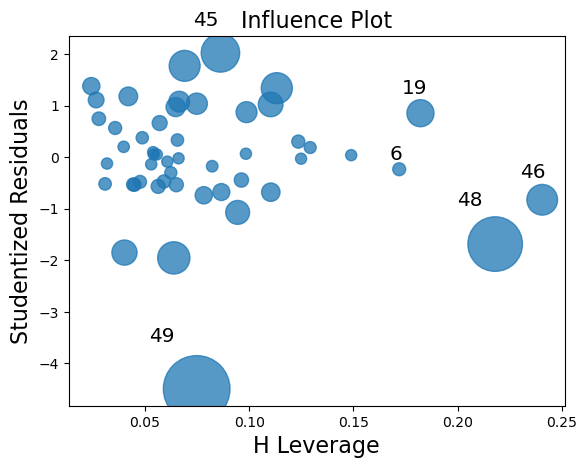

In [85]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [130]:
k = 3
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.24

From the above plot, it is evident that data point 48 and 49 are the influencers

In [87]:
data[data.index.isin([48,49])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [88]:
data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [89]:
data1 = data.drop(data.index[[48,49]],axis=0).reset_index()

In [90]:
data1=data1.drop(['index'],axis=1)

In [91]:
data1

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [93]:
m_RD = smf.ols("Profit~RD_Spend+Administration",data=data1).fit()
m_RD

In [94]:
(m_RD.rsquared,m_RD.aic,m_RD.bic)

(0.9613542664192156, 994.3402293693792, 999.9538324021029)

In [95]:
m_mrkt = smf.ols("Profit~Marketing_Spend+Administration",data=data1).fit()
m_mrkt

In [96]:
(m_mrkt.rsquared,m_mrkt.aic,m_mrkt.bic)

(0.5625802937857888, 1110.8101546830774, 1116.423757715801)

Comparing above R-Square and AIC values, model 'm_RD' has high R- square and low AIC value hence include variable 'RD_Spend' so that multi collinearity problem would be resolved.

# Cook’s Distance

In [97]:
model_influence_RD = m_RD.get_influence()
(c_RD, _) = model_influence_RD.cooks_distance

In [98]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_RD,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [99]:
(np.argmax(c_RD),np.max(c_RD))

(14, 0.1165446497672231)

In [101]:
data2=data1.drop(data1.index[[14]],axis=0)  
data2

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [103]:
data2=data2.reset_index() 

In [105]:
data3 = data2.drop(['index'],axis=1) 

In [107]:
data3

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [108]:
m_RD = smf.ols("Profit~RD_Spend+Administration",data=data3).fit()
m_RD

In [109]:
model_influence_RD = m_RD.get_influence()
(c_RD, _) = model_influence_RD.cooks_distance

In [110]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_RD,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [111]:
(np.argmax(c_RD),np.max(c_RD))

(44, 0.09678650589187565)

In [113]:
data4 = data3.drop(data3.index[[44]],axis=0)
data4

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [114]:
data4 = data4.reset_index()
data4

,index,RD_Spend,Administration,Marketing_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [115]:
data5=data4.drop(['index'],axis=1)
data5

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [122]:
m_RD = smf.ols("Profit~RD_Spend+Administration",data=data5).fit()
m_RD

In [123]:
(m_RD.rsquared,m_RD.aic,m_RD.bic)

(0.9664198107977996, 946.5222169260527, 952.00814111552)

In [124]:
model_influence_RD = m_RD.get_influence()
(c_RD, _) = model_influence_RD.cooks_distance

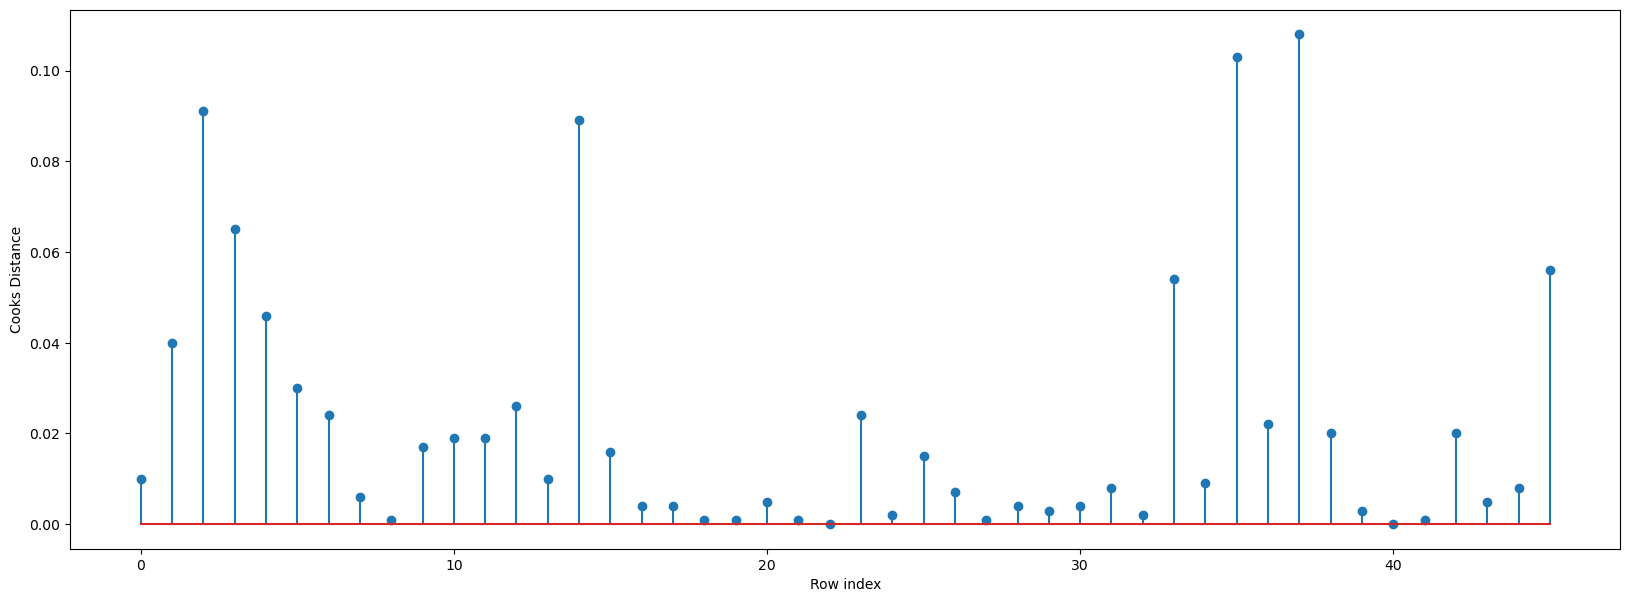

In [125]:
import warnings
warnings.filterwarnings('ignore')
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_RD,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');
plt.show();

In [126]:
(np.argmax(c_RD),np.max(c_RD)) 

(37, 0.10772493345887568)

# Predicting for new data

In [127]:
m_RD.predict(data5.iloc[0:5,])

0    189129.851922
1    185772.430690
2    181703.824629
3    172817.466474
4    172883.134401
dtype: float64

In [128]:
ypred = m_RD.predict(data5)
ypred

0     189129.851922
1     185772.430690
2     181703.824629
3     172817.466474
4     172883.134401
5     163677.936703
6     162559.014424
7     159051.378183
8     150623.011430
9     155859.743150
10    137719.579284
11    138033.872528
12    129747.938870
13    127585.263928
14    147449.088818
15    116840.843297
16    129132.933937
17    128919.734344
18    121601.568109
19    115920.432508
20    114834.597388
21    113378.280229
22    109177.259318
23    117637.284951
24    104327.360953
25    112958.254923
26    111425.747001
27    102382.275580
28    104145.007531
29    103809.426497
30    100413.202450
31    104017.897045
32     99254.990987
33     87690.971265
34     92588.477421
35     74975.800368
36     93391.944206
37     72299.017943
38     86472.275679
39     75666.192565
40     77384.602729
41     72982.849033
42     63894.832234
43     67522.186154
44     52804.817384
45     50283.820534
dtype: float64